In [143]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 4

In [3]:
!pip install -Uqq fastai

In [4]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/master_course/Ethnic_Group_Recognizer

/content/drive/MyDrive/master_course/Ethnic_Group_Recognizer


In [144]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [145]:
#notun data hole abr dataloader build kora lgbe

dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/ethnic_group_dataloader_v{version}.pkl")# model save krbo

In [147]:
# jodi old data hoy tahole puraton dataloader diye kaj korte parbo
# same version er data load kora lgle eta run krbo

dls = torch.load(f"dataloaders/ethnic_group_dataloader_v{version}.pkl")

In [ ]:
dls.train.vocab

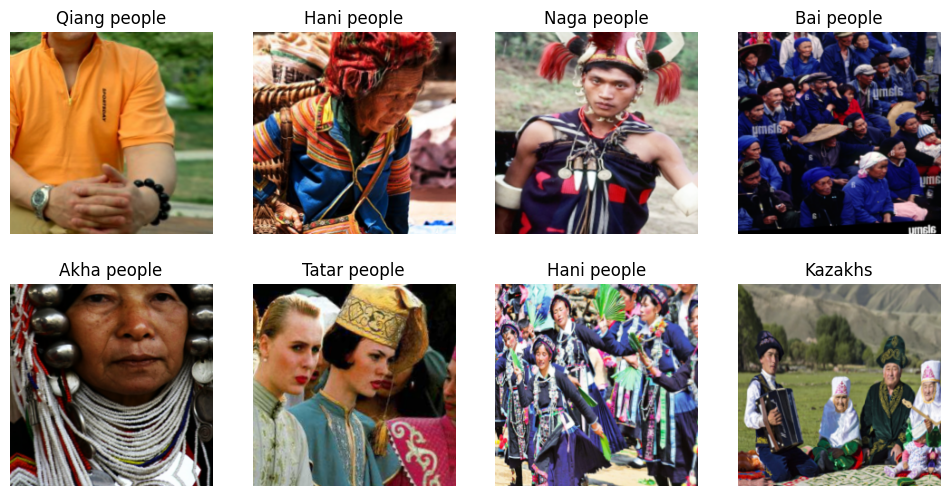

In [148]:
dls.train.show_batch(max_n=8, nrows=2)

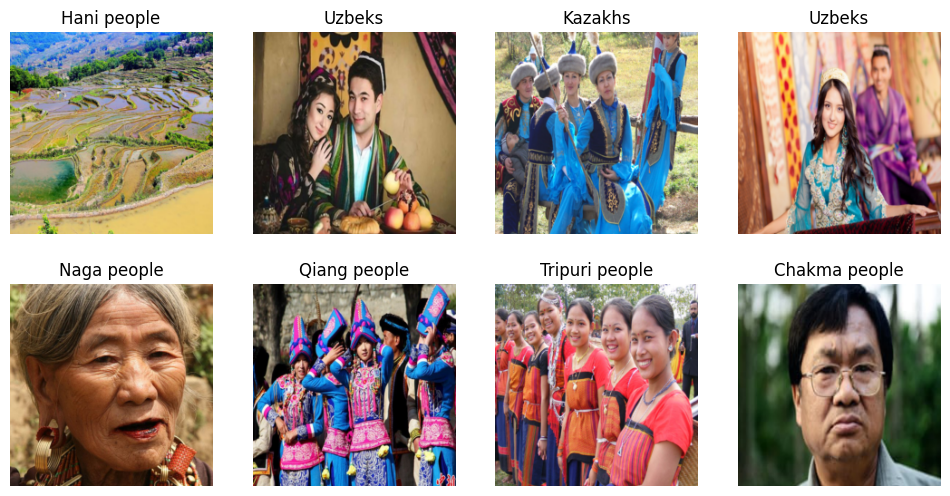

In [149]:
dls.valid.show_batch(max_n=8, nrows=2)

In [150]:
model_path = "models"

In [151]:
#https://timm.fast.ai/ e thaka model `resnet3` er jaygay dilei load hbe. timms er model gula besir vag vision
#transformer model use kora

model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [152]:
# ager model load korte hole eta run krbo
# 2nd bar run korar somoy version-1 dibo. 3rd bar er somoy version-2 hbe

model.load(f"ethnic-group-recognizer-v{version-3}")

In [153]:
model.fine_tune(10)

In [154]:
# model ta save kore rkhchi jate kno karone pc off hoye gele jate save kora model load krte pari
model.save(f"ethnic-group-recognizer-v{version}") # .pth file akare save hbe

Path('models/ethnic-group-recognizer-v4.pth')

In [ ]:
# pc off hoye gele ager save kora model eta diye load korte parbo

# model.load(f"ethnic-group-recognizer-v{version}")

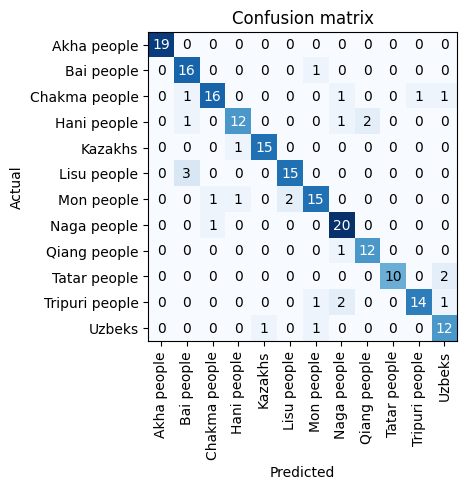

In [155]:
# validation data theke eta banay

interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

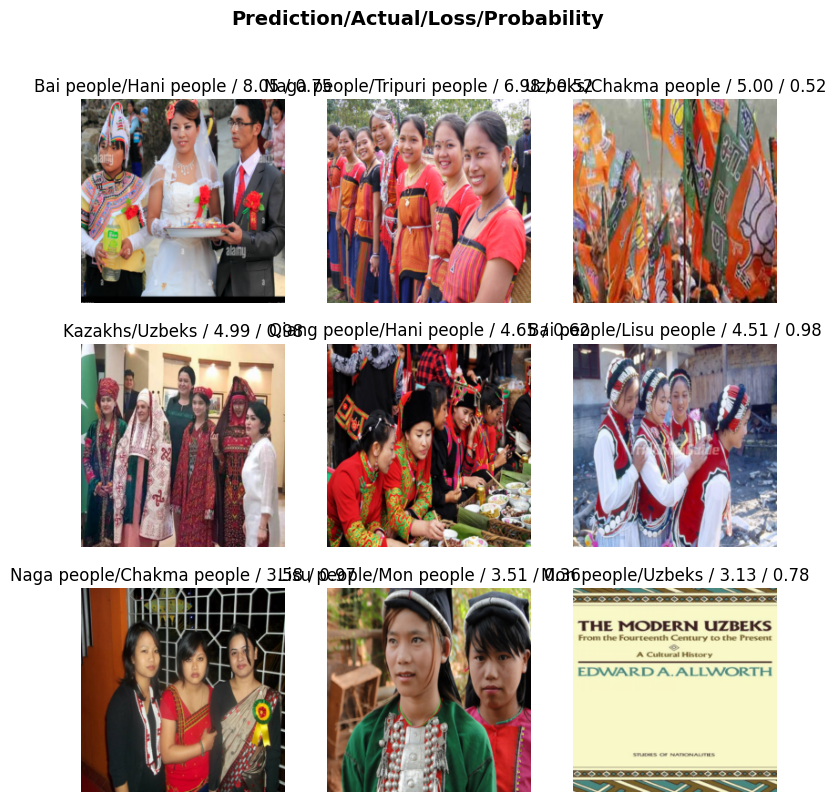

In [156]:
interp.plot_top_losses(9, nrows=3)

In [157]:
cleaner = ImageClassifierCleaner(model) # widget
cleaner # Tatar, Uzbeks, Qiang

In [140]:
cleaner.delete()

(#5) [2,3,5,9,10]

In [141]:
cleaner.change()

(#0) []

In [142]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [158]:
#model export korar pore model r train kora labe na.. (.pkl) model diye tokhn amra `inference` er kaj korte pari

model.export(f"{model_path}/ethnic-group-recognizer-v{version}.pkl") # sbar last e eta run krbo